In [2]:
#!pip install wordcloud
#!pip install nltk

In [3]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

## Data analysis

In [4]:
df = pd.read_csv('./blogtext.csv')
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [5]:
df = df.drop(columns=['id', 'date', 'sign']) #deleting unnessesary columns
df

,gender,age,topic,text
0,male,15,Student,"Info has been found (+/- 100 pages,..."
1,male,15,Student,These are the team members: Drewe...
2,male,15,Student,In het kader van kernfusie op aarde...
3,male,15,Student,testing!!! testing!!!
4,male,33,InvestmentBanking,Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...
681279,male,23,Student,"Dear Susan, I could write some really ..."
681280,male,23,Student,"Dear Susan, 'I have the second yeast i..."
681281,male,23,Student,"Dear Susan, Your 'boyfriend' is fuckin..."
681282,male,23,Student,"Dear Susan: Just to clarify, I am as..."


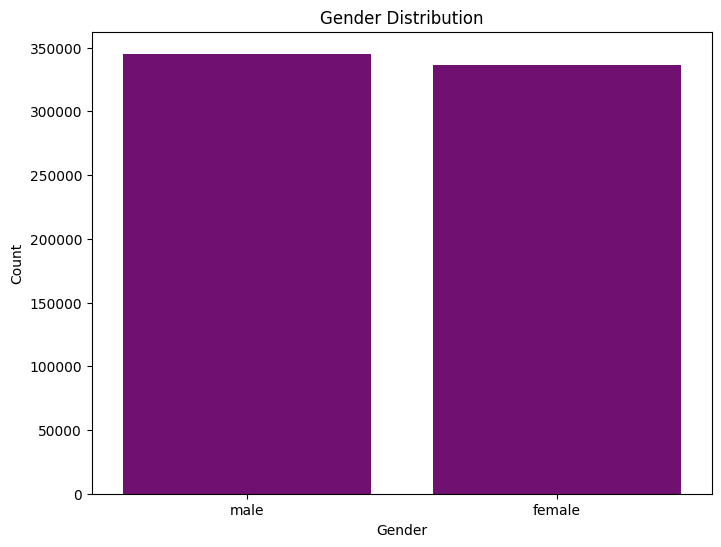

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', color='purple')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

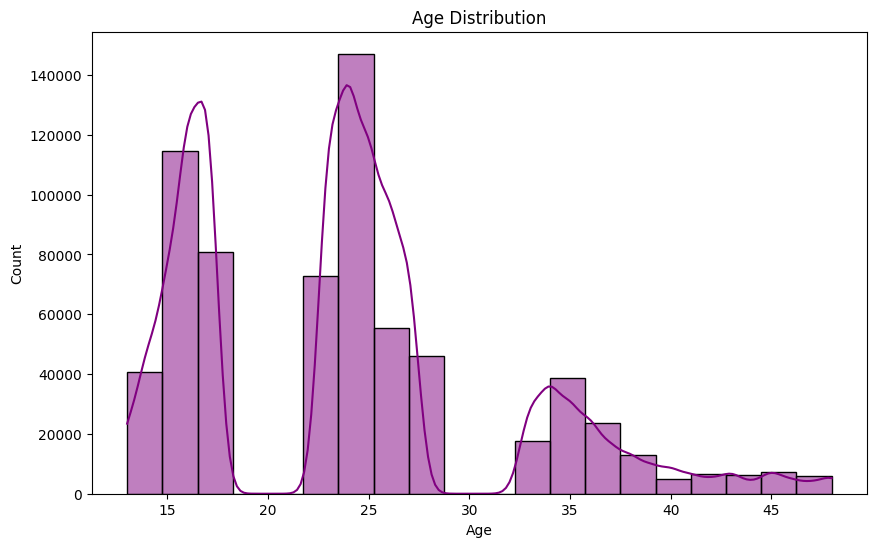

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [8]:
# def plot_top_words(corpus, title, n=20):
#     vectorizer = CountVectorizer(stop_words='english', max_features=1000)
#     X = vectorizer.fit_transform(corpus)
#     word_counts = X.sum(axis=0).A1
#     words = vectorizer.get_feature_names_out()
    
#     word_freq = pd.DataFrame({'word': words, 'count': word_counts})
#     top_words = word_freq.nlargest(n, 'count')
    
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x='count', y='word', data=top_words, palette='flare')
#     plt.title(title)
#     plt.xlabel('Count')
#     plt.ylabel('Word')
#     plt.show()

# # Separate the texts by gender
# male_texts = df[df['gender'] == 'male']['clean_text']
# female_texts = df[df['gender'] == 'female']['clean_text']

# # Plot top words for male bloggers
# plot_top_words(male_texts, 'Top Words for Male Bloggers')

# # Plot top words for female bloggers
# plot_top_words(female_texts, 'Top Words for Female Bloggers')

## Data preprocessing

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def stopwords_removal(text):
    new_words = word_tokenize(text)
    new_filtered_words = [
        lemmatizer.lemmatize(word.lower()) for word in new_words if word.lower() not in stopwords.words('english')
    ]

    return ' '.join(new_filtered_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ciri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ciri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ciri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ciri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
df = df.sample(n=len(df))
df_short = df[:20000]

In [11]:
def text_prerocess(text): #10 minutes
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\W+', ' ', text)
    text = text.lower()
    text = re.sub(r'nbsp', '', text)
    text = re.sub(r'urllink', '', text)
    text = re.sub(r'im', 'i am', text)
        
    return text


df_short['clean_text'] = df_short['text'].apply(text_prerocess)
df_short['clean_topic'] = df_short['topic'].apply(text_prerocess)

df_short['clean_topic'] = df_short['clean_topic'].apply(stopwords_removal)
df_short['clean_text'] = df_short['clean_text'].apply(stopwords_removal)

df_short['combined_text'] = df_short['clean_text'] + ' ' + df_short['clean_topic']

df_short['gender_bi'] = df_short['gender'].map({'male': 1, 'female': 0})

x_train, x_test, y_train, y_test = train_test_split(df_short['combined_text'], df_short[['age','gender_bi']], test_size=0.2, random_state=42)

C:\Users\Ciri\AppData\Local\Temp\ipykernel_27788\3279835170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['clean_text'] = df_short['text'].apply(text_prerocess)
C:\Users\Ciri\AppData\Local\Temp\ipykernel_27788\3279835170.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['clean_topic'] = df_short['topic'].apply(text_prerocess)
C:\Users\Ciri\AppData\Local\Temp\ipykernel_27788\3279835170.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [12]:
# #only part of dataset cause it's too big
# x_train = x_train[:10000] 
# x_test = x_test[:1000]
# y_train = y_train[:10000] 
# y_test = y_test[:1000]

In [13]:
x_train[:15]

23169     glad bring mile davis well music best telescop...
190711    recently school questioning lot first people w...
389440    yesterday go seminar work seminar titled medic...
376029    hello sunday 1 14 p yesterday morning went mar...
571049    another day done really whole lot today went g...
190915    ah raving lunatic gentleman responsible follow...
376549    sad announce alphabean known scott died murder...
558163    ok rumor andy kaufman alive returned 20th anni...
439322    blogg gone quiet need question answered shayne...
466331                                 terrible font indunk
208106    buzzy licking fetish mind pervert would use si...
650897    sound good christina good trip call u get back...
126518    union station office building lady thought tak...
529009    wow clicked homeland security level thing laur...
140246    like busy looking website blog stand link ad e...
Name: combined_text, dtype: object

## Model choosing

In [14]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [15]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Train a Random Forest classifier for age prediction
rf_age = RandomForestRegressor(max_depth=16, max_leaf_nodes=32)
rf_age.fit(x_train_tfidf, y_train['age'])

rf_age.score(x_test_tfidf, y_test['age'])

0.24613097157880148

In [16]:
importances = rf_age.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the top 10 features
top_n = 15
top_features = [vectorizer.get_feature_names_out()[i] for i in indices[:top_n]]
print(f'Top {top_n} features for age prediction: {top_features}')


Top 15 features for age prediction: ['student', 'indunk', 'dont', 'na', 'haha', 'education', '151', 'mm', 'non profit', 'via', 'thats', 'accounting', 'school', 'rick', 'profit']


## Gender

In [17]:
# Train a Random Forest classifier for gender prediction
rf_gender = RandomForestClassifier(n_estimators=100, random_state=42)
rf_gender.fit(x_train_tfidf, y_train['gender_bi'])

rf_gender.score(x_test_tfidf, y_test['gender_bi'])
# Predict and evaluate
gender_predictions = rf_gender.predict(x_test_tfidf)
print(classification_report(y_test['gender_bi'], gender_predictions))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66      1970
           1       0.67      0.58      0.62      2030

    accuracy                           0.64      4000
   macro avg       0.64      0.64      0.64      4000
weighted avg       0.64      0.64      0.64      4000



In [18]:
importances_gender = rf_gender.feature_importances_
indices_gender = np.argsort(importances_gender)[::-1]

# Print the top 10 features for gender prediction
top_features_gender = [vectorizer.get_feature_names_out()[i] for i in indices_gender[:top_n]]
print(f'Top {top_n} features for gender prediction: {top_features_gender}')

Top 15 features for gender prediction: ['technology', 'indunk', 'student', 'love', 'internet', 'like', 'know', 'go', 'get', 'art', 'hi', 'one', 'feel', 'game', 'day']


## Results analysis

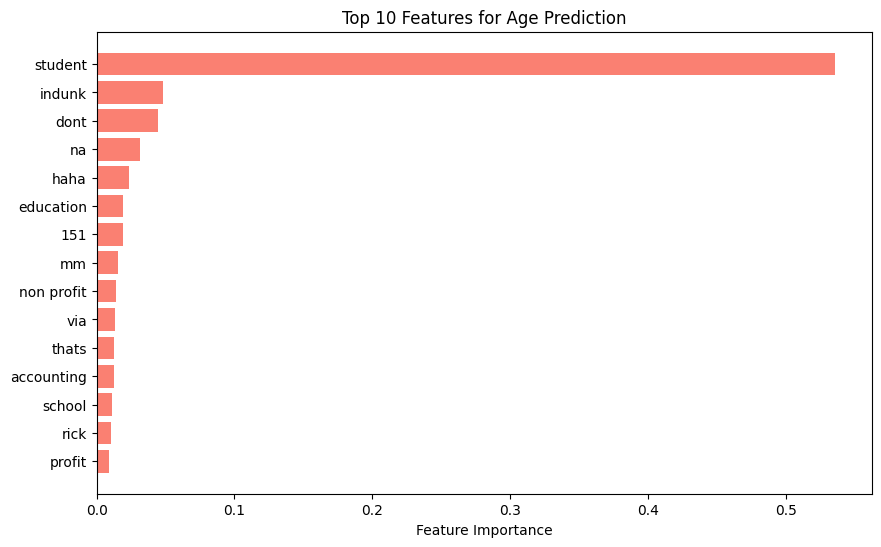

In [19]:
top_importances_age = importances[indices[:top_n]]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances_age, align='center', color='salmon')
plt.yticks(range(top_n), top_features)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 15 Features for Age Prediction')
plt.show()

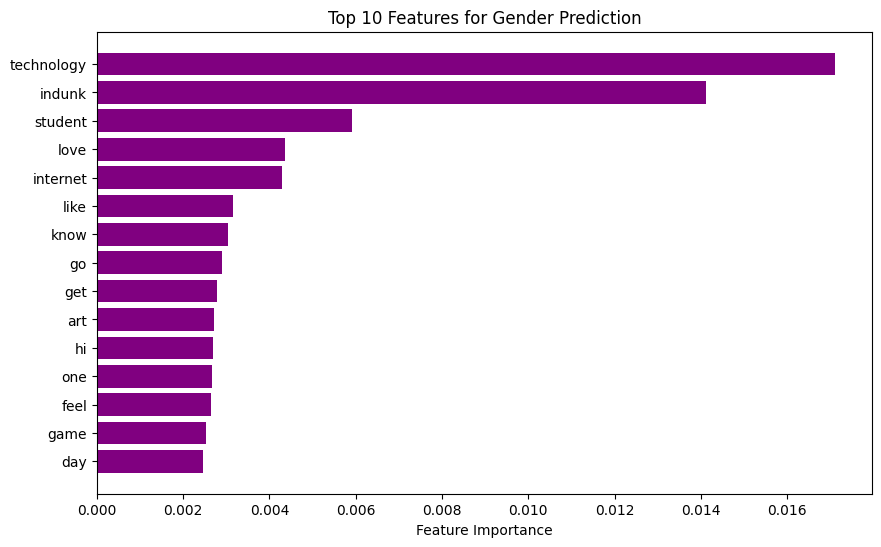

In [20]:
top_importances_gender = importances_gender[indices_gender[:top_n]]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances_gender, align='center', color='purple')
plt.yticks(range(top_n), top_features_gender)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 15 Features for Gender Prediction')
plt.show()

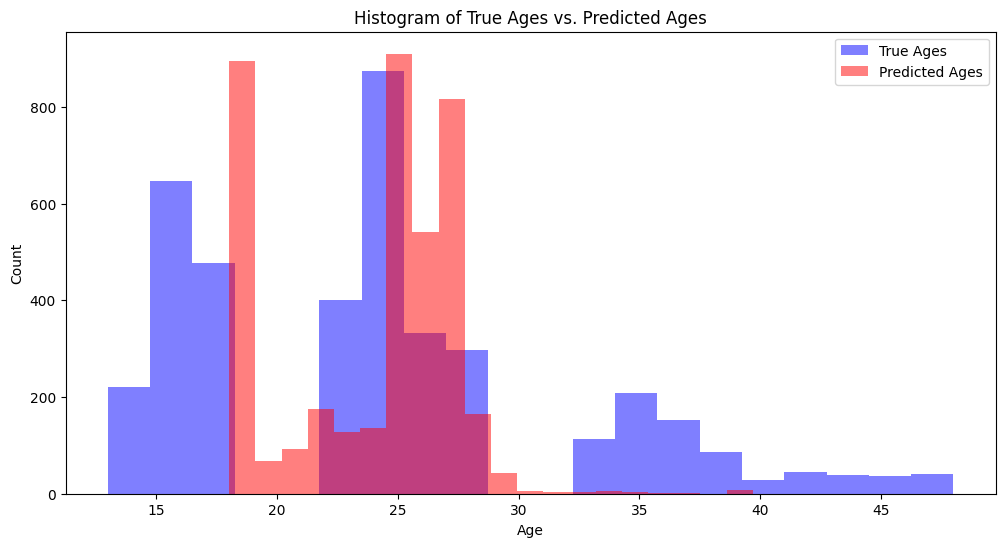

In [21]:
# Predict ages using the trained model
predicted_ages = rf_age.predict(x_test_tfidf)

# Plot histogram of predicted ages vs. true ages
plt.figure(figsize=(12, 6))
plt.hist(y_test['age'], bins=20, alpha=0.5, label='True Ages', color='blue')
plt.hist(predicted_ages, bins=20, alpha=0.5, label='Predicted Ages', color='red')
plt.title('Histogram of True Ages vs. Predicted Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()


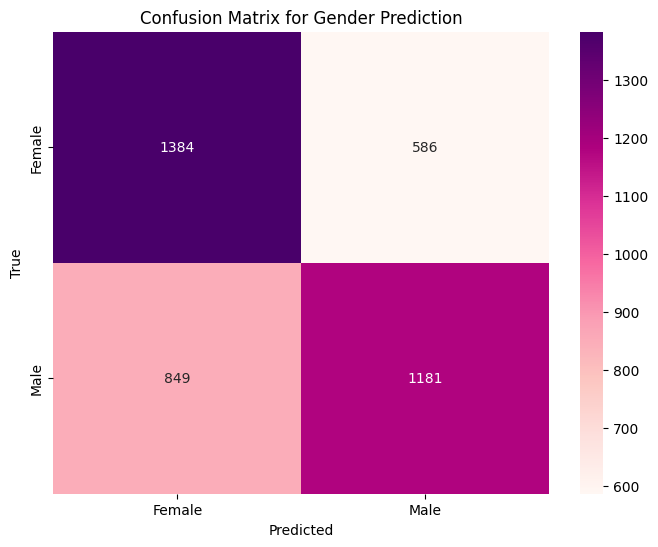

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict genders using the trained model
predicted_genders = rf_gender.predict(x_test_tfidf)

# Compute confusion matrix
cm = confusion_matrix(y_test['gender_bi'], predicted_genders)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title('Confusion Matrix for Gender Prediction')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [23]:
def decategorize(gender:list):
    res = []

    if gender == 0:
        res = 'female'
    else:
        res = 'male'
    
    return res

# For user

In [35]:
your_text = 'I would love to go to the gallery with you after university! I heard they are exhibiting the most famous paintings of Monet, he is my favourite painter, i am so excited!'

In [36]:
#Now run this cell and it will give you result

text = text_prerocess(your_text)
text = stopwords_removal(text)

text = pd.Series(your_text)

text = vectorizer.transform(text)

pred_age = rf_age.predict(text)
pred_gen = rf_gender.predict(text)

result = decategorize(pred_gen)
print(f'The author\'s age is : {round(pred_age[0])}\nAuthor\'s gender: {result}')

The author's age is : 27
Author's gender: female
